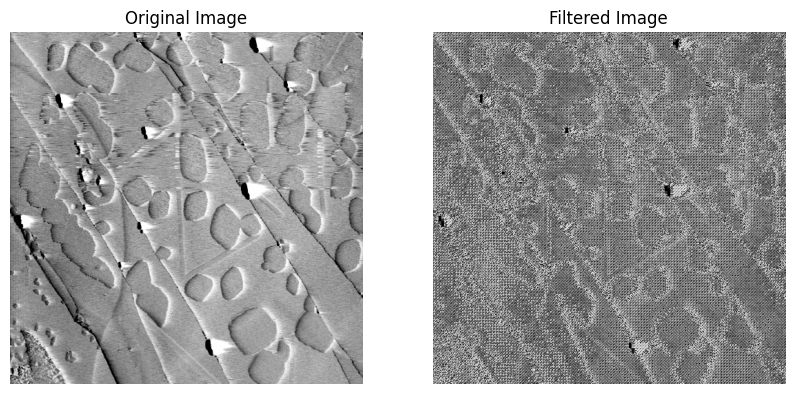

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread('/content/1_amplitude.jpg', 0)  # Load as grayscale

# Define the dimensions of the parts
part_rows = 4
part_cols = 4

# Split the image into parts
rows, cols = image.shape
num_rows = rows // part_rows
num_cols = cols // part_cols

# Initialize an empty array to store the filtered parts
filtered_parts = []

# Loop through each part, apply FFT and filtering, and store the results
for r in range(num_rows):
    for c in range(num_cols):
        # Crop the part
        part = image[r*part_rows:(r+1)*part_rows, c*part_cols:(c+1)*part_cols]

        # Apply FFT
        f = np.fft.fft2(part)
        fshift = np.fft.fftshift(f)
        magnitude_spectrum = np.abs(fshift)  # Remove logarithmic transformation

        # Apply filtering (e.g., Gaussian blur)
        filtered_magnitude = cv2.GaussianBlur(magnitude_spectrum, (5, 5), 0)
        filtered_parts.append(filtered_magnitude)

# Recombine the parts into the filtered image
filtered_image = np.zeros_like(image)
index = 0
for r in range(num_rows):
    for c in range(num_cols):
        part_filtered = filtered_parts[index]
        part_filtered[np.isnan(part_filtered)] = 0  # Replace NaN with zero
        filtered_image[r*part_rows:(r+1)*part_rows, c*part_cols:(c+1)*part_cols] = part_filtered
        index += 1

# Display the original and filtered images
plt.figure(figsize=(10, 5))  # Set the size of the figure
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.show()


In [ ]:
from PIL import Image

# Open the image file
image_path = input("Enter the path to the image file: ")
im = Image.open(image_path)

# Get and display the dimensions of the image
width, height = im.size
print("Image dimensions (width x height):", width, "x", height)

Enter the path to the image file: /content/1_amplitude.jpg
Image dimensions (width x height): 512 x 512


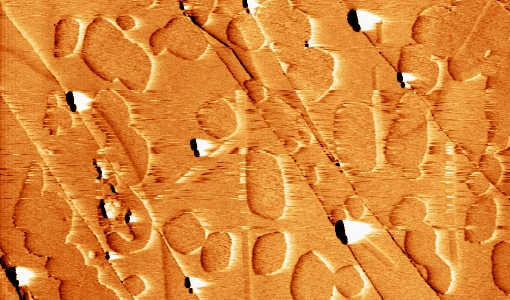

Cropped image saved successfully.


In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# Path to the image in your Colab environment
image_path = "/content/1_amplitude.jpg"

# Load the image using OpenCV
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print("Error: Unable to load image.")
else:
    # Define the cropping region
    x = 0
    y = 0
    h = 300
    w = 510

    # Crop the image
    crop_image = image[y:h, x:w]

    # Display the cropped image
    cv2_imshow(crop_image)
    # Save the cropped image
    cv2.imwrite("/content/cropped_image.jpg", crop_image)

    print("Cropped image saved successfully.")

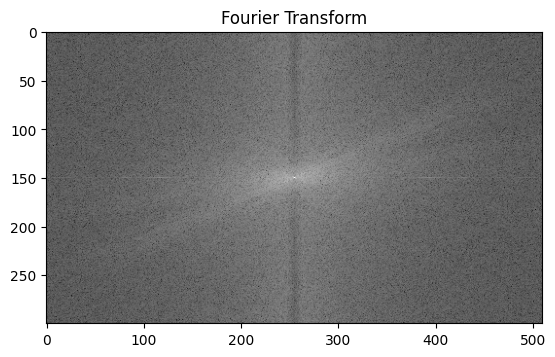

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Specify the path to the uploaded image in Colab
image_path = "/content/cropped_image.jpg"

# Load the image
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Compute the discrete Fourier Transform of the image
fourier = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero-frequency component to the center of the spectrum
fourier_shift = np.fft.fftshift(fourier)

# Calculate the magnitude of the Fourier Transform
magnitude = 20 * np.log(cv2.magnitude(fourier_shift[:, :, 0], fourier_shift[:, :, 1]))

# Scale the magnitude for display
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

# Display the magnitude of the Fourier Transform using matplotlib
plt.imshow(magnitude, cmap='gray')
plt.title('Fourier Transform')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray

def fourier_masker_hor(image, i):
    f_size = 15

    # Convert the image to grayscale
    dark_image_grey = rgb2gray(image)

    # Compute the Fourier Transform of the grayscale image
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(dark_image_grey))

    # Apply the horizontal mask to the Fourier Transform
    dark_image_grey_fourier[235:240, :230] = i
    dark_image_grey_fourier[235:240, -230:] = i

    # Display the Masked Fourier Transform
    fig, ax = plt.subplots(1, 3, figsize=(15, 15))
    ax[0].imshow(np.log(np.abs(dark_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize=f_size)

    # Display the Greyscale Image
    ax[1].imshow(dark_image_grey, cmap='gray')
    ax[1].set_title('Greyscale Image', fontsize=f_size)

    # Display the Transformed Greyscale Image
    ax[2].imshow(np.abs(np.fft.ifft2(dark_image_grey_fourier)), cmap='gray')
    ax[2].set_title('Transformed Greyscale Image', fontsize=f_size)

    plt.show()

# Load the image
dark_image = imread("/content/cropped_image.jpg")

# Example usage: Replace '1' with the value you want to use for masking
fourier_masker_hor(dark_image, 0.001)

FileNotFoundError: No such file: '/content/cropped_image.jpg'

In [ ]:
def fourier_masker_ver(image, i):
  f_size = 15

  # Convert the image to grayscale
  dark_image_grey = rgb2gray(image)

  # Compute the Fourier Transform of the grayscale image
  dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(dark_image_grey))

  # Apply the vertical mask to the Fourier Transform
  dark_image_grey_fourier[:, 215:220] = i  # Mask columns

  # Display the Masked Fourier Transform
  fig, ax = plt.subplots(1, 3, figsize=(15, 15))
  ax[0].imshow(np.log(np.abs(dark_image_grey_fourier)), cmap='gray')
  ax[0].set_title('Masked Fourier (Vertical)', fontsize=f_size)

  # Display the Greyscale Image
  ax[1].imshow(dark_image_grey, cmap='gray')
  ax[1].set_title('Greyscale Image', fontsize=f_size)

  # Display the Transformed Greyscale Image
  ax[2].imshow(np.abs(np.fft.ifft2(dark_image_grey_fourier)), cmap='gray')
  ax[2].set_title('Transformed Greyscale Image', fontsize=f_size)

  plt.show()

# Load the image
dark_image = imread("/content/cropped_image.jpg")

# Example usage: Replace '1' with the value you want to use for masking
fourier_masker_ver(dark_image, 0.001)

FileNotFoundError: No such file: '/content/cropped_image.jpg'

# Ma'am Please check this

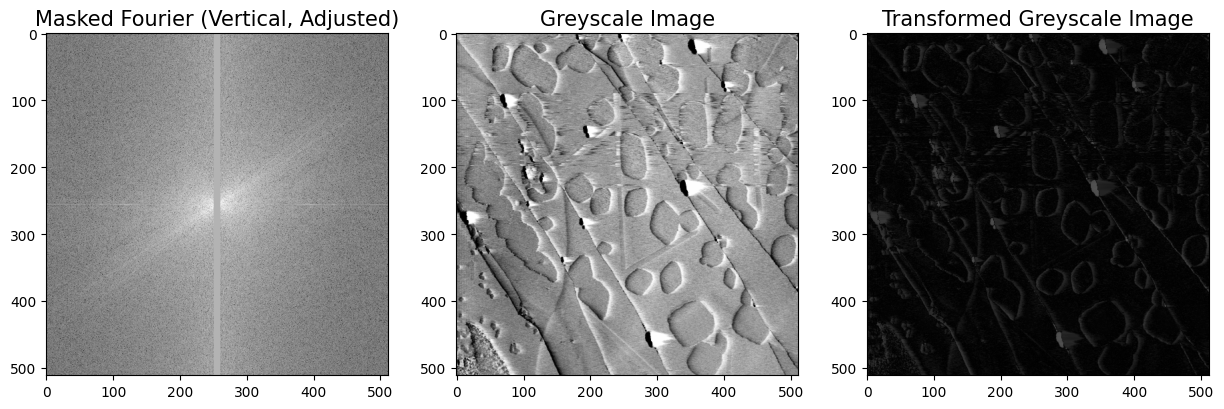

In [ ]:
def fourier_masker_ver(image, i, mask_width=20, mask_offset=0):
  f_size = 15

  # Convert the image to grayscale
  dark_image_grey = rgb2gray(image)

  # Compute the Fourier Transform of the grayscale image
  dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(dark_image_grey))

  # Apply the vertical mask to the Fourier Transform, with offset for noise alignment
  dark_image_grey_fourier[:, mask_offset:mask_offset+mask_width] = i  # Mask columns with offset

  # Display the Masked Fourier Transform
  fig, ax = plt.subplots(1, 3, figsize=(15, 15))
  ax[0].imshow(np.log(np.abs(dark_image_grey_fourier)), cmap='gray')
  ax[0].set_title('Masked Fourier (Vertical, Adjusted)', fontsize=f_size)

  # Display the Greyscale Image
  ax[1].imshow(dark_image_grey, cmap='gray')
  ax[1].set_title('Greyscale Image', fontsize=f_size)

  # Display the Transformed Greyscale Image
  ax[2].imshow(np.abs(np.fft.ifft2(dark_image_grey_fourier)), cmap='gray')
  ax[2].set_title('Transformed Greyscale Image', fontsize=f_size)

  plt.show()

# Load the image
dark_image = imread("/content/1_amplitude.jpg")

# Example usage: Adjust mask_width and mask_offset to target noise
fourier_masker_ver(dark_image, 100, mask_width=10, mask_offset=251)

<ipython-input-5-11c62e7e0eb5>:20: RuntimeWarning: divide by zero encountered in log
  ax[0].imshow(np.log(np.abs(dark_image_grey_fourier)), cmap='gray')


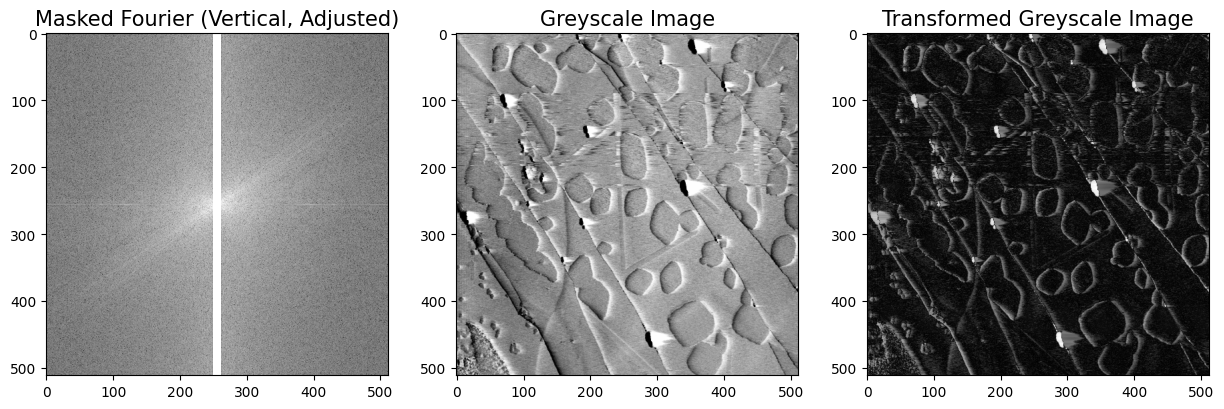

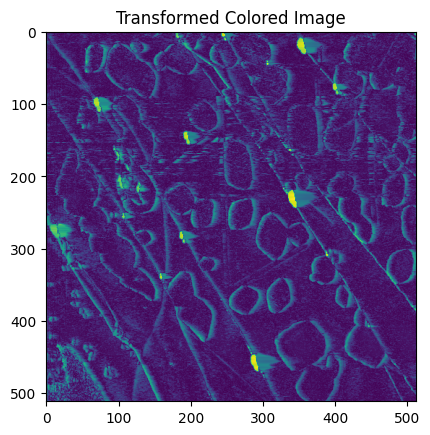

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.io import imread

def fourier_masker_ver(image, i, mask_width=20, mask_offset=0):
    f_size = 15

    # Convert the image to grayscale
    dark_image_grey = rgb2gray(image)

    # Compute the Fourier Transform of the grayscale image
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(dark_image_grey))

    # Apply the vertical mask to the Fourier Transform, with offset for noise alignment
    dark_image_grey_fourier[:, mask_offset:mask_offset+mask_width] = i  # Mask columns with offset

    # Display the Masked Fourier Transform
    fig, ax = plt.subplots(1, 3, figsize=(15, 15))
    ax[0].imshow(np.log(np.abs(dark_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier (Vertical, Adjusted)', fontsize=f_size)

    # Compute the inverse Fourier Transform to get the transformed grayscale image
    transformed_image = np.abs(np.fft.ifft2(np.fft.ifftshift(dark_image_grey_fourier)))

    # Display the Greyscale Image
    ax[1].imshow(dark_image_grey, cmap='gray')
    ax[1].set_title('Greyscale Image', fontsize=f_size)

    # Display the Transformed Greyscale Image
    ax[2].imshow(transformed_image, cmap='gray')
    ax[2].set_title('Transformed Greyscale Image', fontsize=f_size)

    plt.show()

    # Return the transformed colored image
    return transformed_image

# Load the image
dark_image = imread("/content/1_amplitude.jpg")

# Example usage: Adjust mask_width and mask_offset to target noise
transformed_image = fourier_masker_ver(dark_image, 0, mask_width=10, mask_offset=251)

# Display the transformed colored image
plt.imshow(transformed_image)
plt.title('Transformed Colored Image')
plt.show()

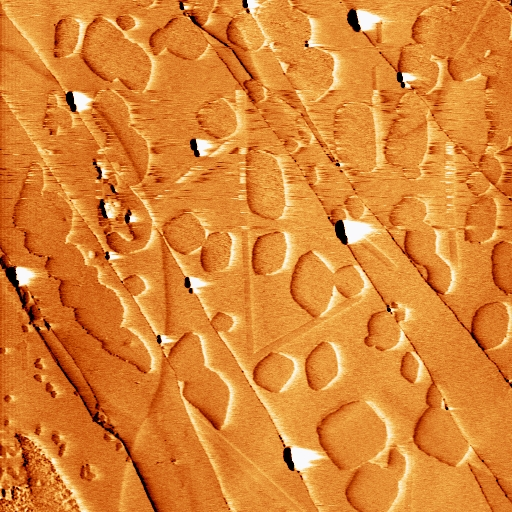

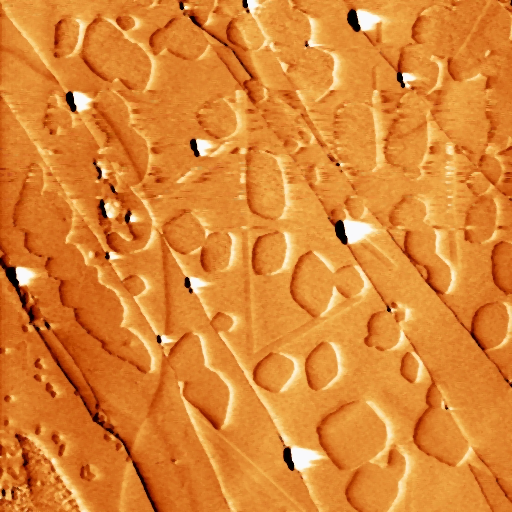

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

def apply_median_filter(image_path, kernel_size=3):
    # Read the image
    image = cv2.imread(image_path)

    # Apply median filter to the color image
    filtered_image_color = cv2.medianBlur(image, kernel_size)

    # Display the original and filtered color images
    cv2_imshow(image)
    cv2_imshow(filtered_image_color)

# Specify the path to the image
image_path = '/content/1_amplitude.jpg'

# Apply median filter with kernel size 3x3
apply_median_filter(image_path, kernel_size=3)

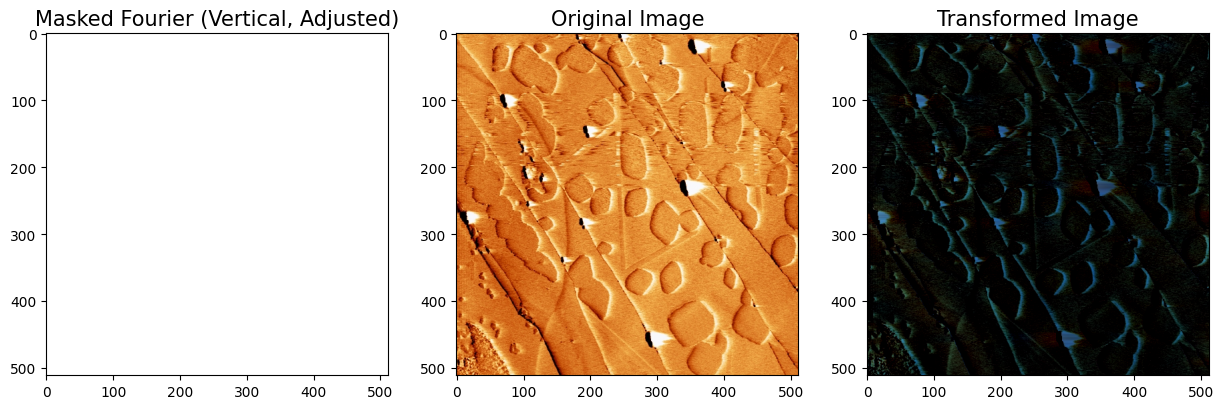

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.io import imread

def fourier_masker_ver(image, i, mask_width=20, mask_offset=0):
    f_size = 15

    # Compute the Fourier Transform of the image for each color channel
    image_fourier = np.fft.fftshift(np.fft.fft2(image, axes=(0, 1)), axes=(0, 1))

    # Apply the vertical mask to each color channel separately
    for c in range(3):  # Loop over color channels
        image_fourier[:, :, c][:, mask_offset:mask_offset+mask_width] = i  # Mask columns with offset

    # Perform inverse Fourier transform to obtain the transformed image
    transformed_image = np.fft.ifft2(np.fft.ifftshift(image_fourier, axes=(0, 1)), axes=(0, 1))

    # Combine real parts of color channels
    transformed_image_real = np.real(transformed_image)

    # Clip values to ensure they are within the valid range
    transformed_image_real = np.clip(transformed_image_real, 0, 255)

    # Display the Masked Fourier Transform
    fig, ax = plt.subplots(1, 3, figsize=(15, 15))
    ax[0].imshow(np.log(np.abs(image_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier (Vertical, Adjusted)', fontsize=f_size)

    # Display the Original Image
    ax[1].imshow(image / 255.0)  # Normalize pixel values to [0, 1] range
    ax[1].set_title('Original Image', fontsize=f_size)

    # Display the Transformed Image
    ax[2].imshow(transformed_image_real.astype(np.uint8))
    ax[2].set_title('Transformed Image', fontsize=f_size)

    plt.show()

# Load the image in color mode
dark_image = imread("/content/1_amplitude.jpg")

# Example usage: Adjust mask_width and mask_offset to target noise
fourier_masker_ver(dark_image, 100, mask_width=10, mask_offset=251)

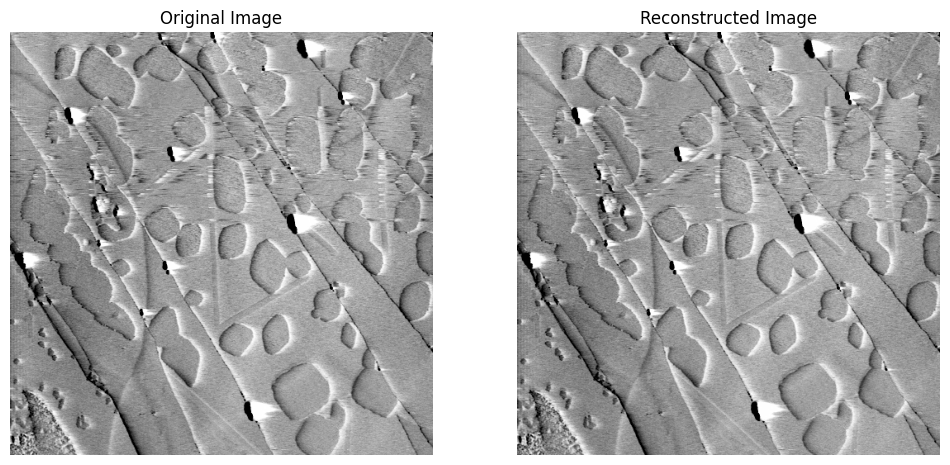

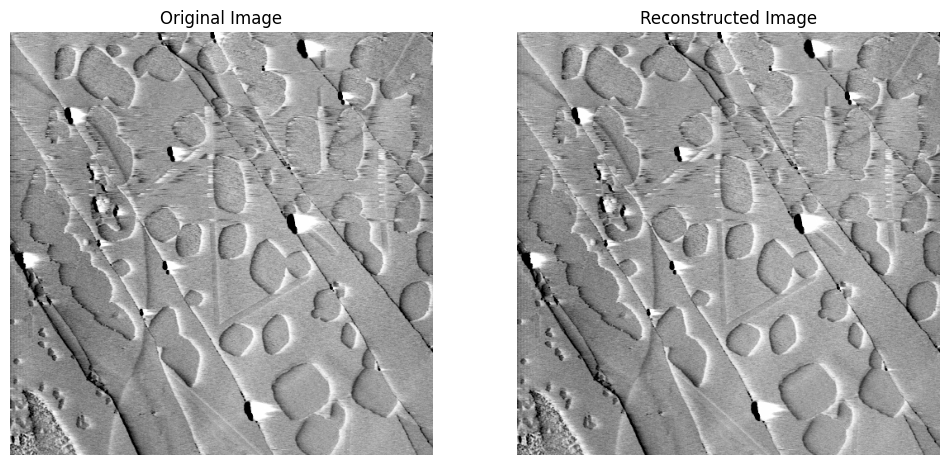

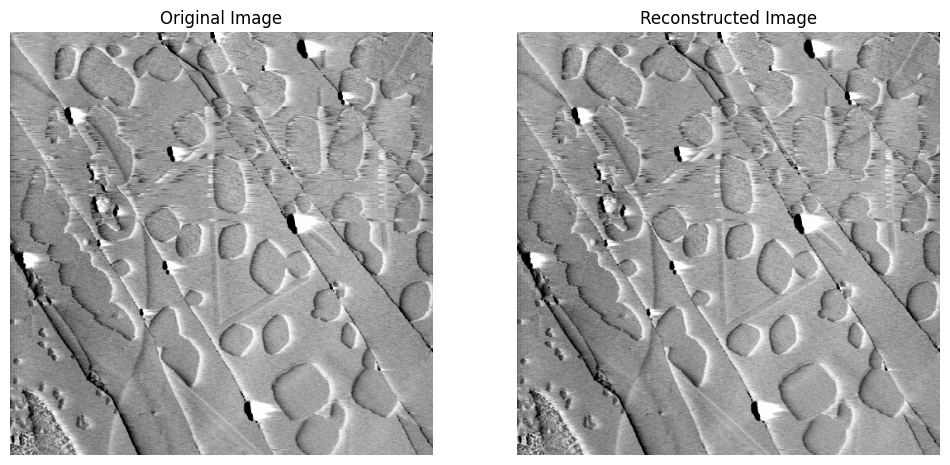

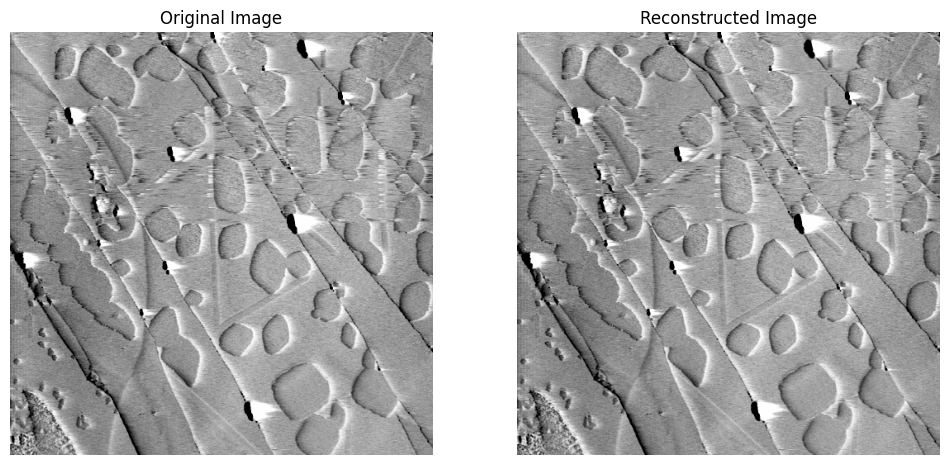

/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


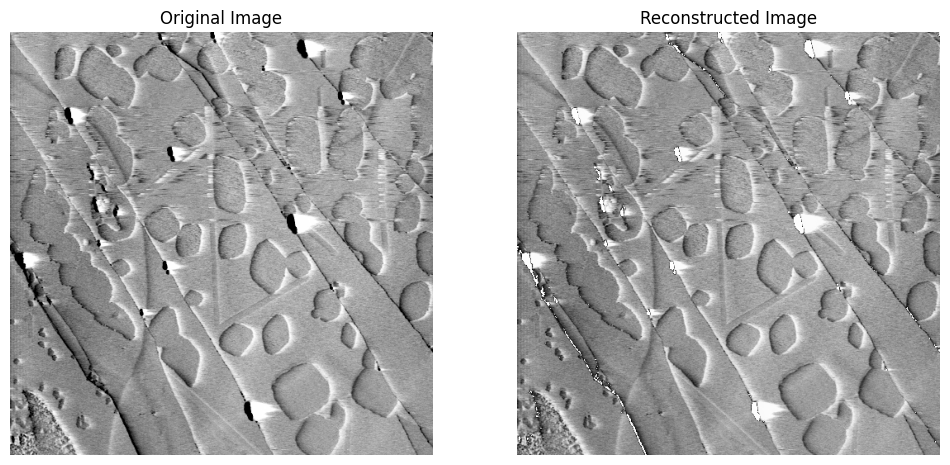

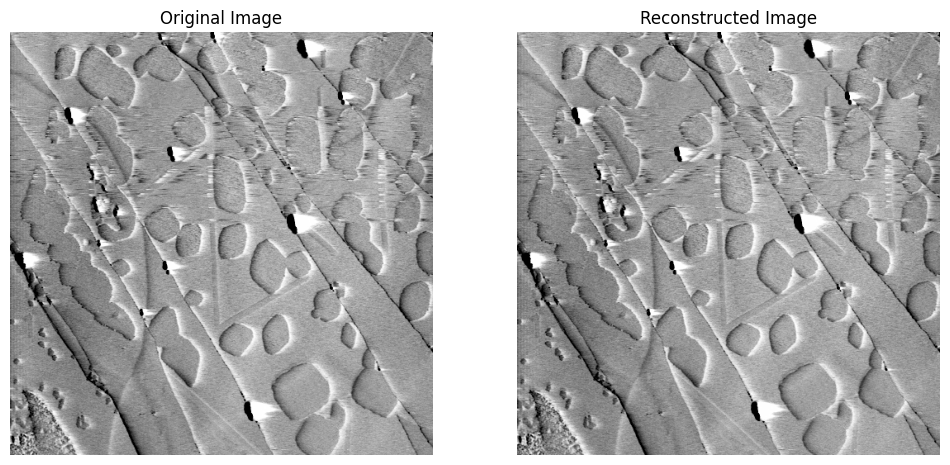

In [ ]:
import cv2
import pywt
import matplotlib.pyplot as plt

def apply_wavelet_transform(image_path, wavelet='haar', level=5):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply the wavelet transform
    coeffs = pywt.wavedec2(image, wavelet, level=level)

    # Reconstruct the image from the coefficients
    reconstructed_image = pywt.waverec2(coeffs, wavelet)

    # Display the original and reconstructed images
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    ax[1].imshow(reconstructed_image.astype('uint8'), cmap='gray')
    ax[1].set_title('Reconstructed Image')
    ax[1].axis('off')
    plt.show()
# Specify the path to the image
image_path = '/content/1_amplitude.jpg'

# Example usage with different wavelets
apply_wavelet_transform(image_path, wavelet='db1', level=5)  # Daubechies wavelet
apply_wavelet_transform(image_path, wavelet='sym2', level=5)  # Symlet wavelet
apply_wavelet_transform(image_path, wavelet='coif1', level=5)  # Coiflet wavelet
apply_wavelet_transform(image_path, wavelet='bior1.3', level=5)  # Biorthogonal wavelet
apply_wavelet_transform(image_path, wavelet='dmey', level=5)  # Discrete Meyer wavelet
apply_wavelet_transform(image_path, wavelet='haar', level=5)  # Discrete Meyer wavelet

Saving 1_amplitude.jpg to 1_amplitude (1).jpg


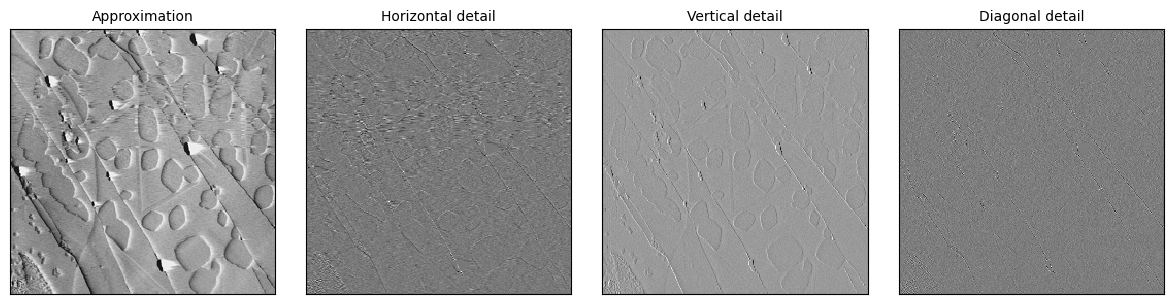

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pywt
from google.colab import files

# Upload the image file
uploaded = files.upload()

# Get the filename of the uploaded image
file_name = next(iter(uploaded))

# Load the uploaded image
original = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', 'Horizontal detail', 'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2

fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()